## Unit Economics y Cohorts


## Economía Unitaria (Unit Economics)

**Objetivo de esta Sección:**
Introducir y profundizar en el concepto de Unit Economics, destacando su importancia en la toma de decisiones empresariales y la planificación estratégica.

### ¿Qué son los Unit Economics?

Los **unit economics** se refieren a los ingresos y costos asociados a un modelo de negocio específico, expresados por unidad de producto o servicio. Este análisis permite a las empresas entender profundamente la rentabilidad de cada unidad vendida o cada cliente servido, lo cual es esencial para evaluar la viabilidad y escalabilidad del negocio.

### Métricas Clave en Economía Unitaria

1. **Costo de Adquisición de Clientes (CAC)**
    - **Definición**: El CAC es el costo total asociado a la adquisición de un nuevo cliente. Incluye todas las actividades de marketing y ventas divididas por el número de clientes adquiridos.
    - **Fórmula**: 
     $
     CAC = \frac{\text{Gastos Totales en Marketing y Ventas}}{\text{Número de Clientes Adquiridos}}
     $
    - **¿Importancia?**

2. **Valor de Vida del Cliente (LTV)**
    - **Definición**: El LTV representa el ingreso total que se espera generar de un cliente a lo largo de su relación con la empresa.
    - **Fórmula**: 
     $
     LTV = \frac{\text{ARPU} \times \text{Margen Bruto}}{\text{Tasa de Cancelación}}
     $
    - Donde **ARPU** es el ingreso promedio por usuario y la **tasa de cancelación** es el porcentaje de clientes que dejan de serlo cada periodo.
    - **¿Importancia?**

3. **Margen Bruto**
    - **Definición**: El margen bruto indica la rentabilidad de los productos o servicios después de cubrir los costos directos asociados con la producción y venta.
    - **Fórmula**: 
     $
     \text{Margen Bruto} = \frac{\text{Ingresos Totales} - \text{Costos de Bienes Vendidos}}{\text{Ingresos Totales}}
     $
    - **¿Importancia?**

### Importancia de los Unit Economics

Entender las economías unitarias es crucial para cualquier negocio, especialmente para startups y empresas en crecimiento que necesitan validar la sostenibilidad de su modelo de negocio. Estas métricas ayudan a los líderes empresariales a tomar decisiones informadas sobre dónde invertir recursos, cómo optimizar estrategias de marketing, y cuándo ajustar precios o costos para mejorar la rentabilidad general.


## Comprendiendo las Cohortes (Cohorts)

### Definición de Cohortes
Una cohorte en análisis de negocios agrupa individuos, clientes o usuarios que comparten características comunes dentro de un período de tiempo definido. Esta agrupación permite a las empresas analizar y comparar cambios y respuestas a lo largo del tiempo en un contexto estructurado.

- Ejemplo Práctico: En un entorno de comercio electrónico, un cohort puede ser definido por los clientes que se inscribieron en un mismo mes. Esto ayuda a la empresa a observar cómo estos grupos específicos de clientes evolucionan en términos de comportamiento de compra y retención, mes a mes.

### Aplicación del Análisis de Cohortes
El análisis de cohortes es una herramienta poderosa para:

- Seguimiento de Comportamiento: Identificar patrones de comportamiento a lo largo del tiempo, como la frecuencia de compra o la tasa de retención.

- Evaluación de Cambios: Medir el impacto de cambios específicos o eventos, como una nueva campaña de marketing o cambios en la política de precios.

- Optimización de Estrategias: Ajustar estrategias de marketing y operaciones basadas en el comportamiento y las respuestas de cada cohort.

- Ejemplo de Aplicación: Utilizando los datos de compra y registros, las empresas pueden identificar qué cohorts están gastando más, tienen una tasa de retención más alta o responden mejor a ciertas campañas de marketing.

### Beneficios del Análisis de Cohortes
El análisis de cohortes ofrece ventajas significativas en el análisis de datos, incluyendo:

- Mayor Precisión en Predicciones: Al analizar grupos que experimentaron sus respectivos ciclos de compra de manera similar, las predicciones sobre su comportamiento futuro son generalmente más precisas.
- Insights Profundos sobre Rendimiento de Producto: Entender cómo diferentes grupos responden a productos o servicios puede revelar qué aspectos están funcionando bien o qué necesita mejorarse.
- Mejora en la Retención de Clientes: Al identificar y analizar las razones detrás de las tasas de churn en diferentes cohortes, las empresas pueden implementar estrategias más efectivas de retención.

### Preguntas

1. ¿Cómo podría una empresa de comercio electrónico utilizar el análisis de cohorts para mejorar la retención de clientes?
    - Reflexione sobre cómo el análisis de la actividad del cliente desde su fecha de registro puede ayudar a identificar patrones de abandono.

2. ¿De qué manera el análisis de cohortes puede ayudar a una startup a medir el impacto de cambios en el producto sobre la satisfacción del cliente?
    - Considere cómo agrupar a los usuarios según las versiones del producto que han utilizado podría revelar insights sobre las características que aumentan la retención o satisfacción.

3. ¿Cuáles métricas específicas se deberían analizar en un análisis de cohortes para un servicio de suscripción mensual?
    - Piense en métricas como tasa de renovación, valor promedio de renovación y tiempo hasta la cancelación.

4. ¿Cómo podría una empresa ajustar sus estrategias de marketing basándose en los resultados de un análisis de cohortes?
    - Discuta cómo los datos de comportamiento de compra y respuesta a campañas previas pueden influir en futuras decisiones de marketing y personalización de ofertas.

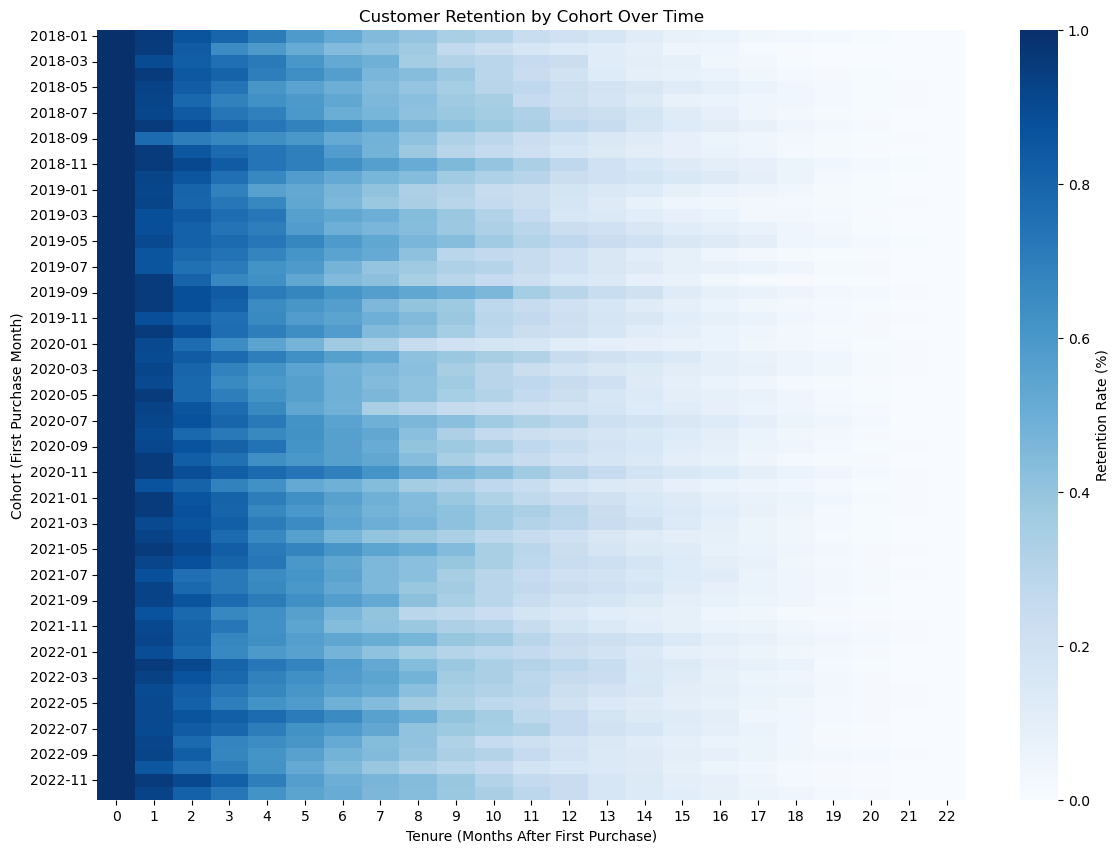

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define time period (5 years, monthly data)
dates = pd.date_range(start='2018-01-01', periods=60, freq='MS')

# Simulate 2000 unique customers with varying start dates
customer_ids = np.arange(1000, 3000)
start_dates = np.random.choice(dates, size=len(customer_ids), replace=True)
start_dates.sort()

# Create DataFrame of customers and their first purchase dates
customers = pd.DataFrame({'customer_id': customer_ids, 'start_date': start_dates})
customers['cohort'] = customers['start_date'].dt.to_period('M')

# Generate monthly data for each customer simulating retention over time
records = []
for _, row in customers.iterrows():
    periods = np.random.randint(1, 24)  # Customers stay for 1 to 24 months
    dates = pd.date_range(start=row['start_date'], periods=periods, freq='M')
    records.extend([(row['customer_id'], date) for date in dates])

# Create a DataFrame for all records
df = pd.DataFrame(records, columns=['customer_id', 'date'])
df['order_month'] = df['date'].dt.to_period('M')

# Calculate cohorts and period numbers
df['cohort'] = df.groupby('customer_id')['date'].transform('min').dt.to_period('M')
df['period_number'] = (df['order_month'] - df['cohort']).apply(lambda x: x.n)

# Calculate number of customers in each cohort per period
cohort_data = df.groupby(['cohort', 'period_number']).agg(n_customers=('customer_id', 'nunique')).reset_index()
cohort_pivot = cohort_data.pivot(index='cohort', columns='period_number', values='n_customers').fillna(0)

# Calculate retention rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Create a decreasing trend in retention by applying a decay factor
decay = retention.columns / retention.columns.max()
retention *= np.tile(1 - decay, (retention.shape[0], 1))

# Plotting the retention matrix
plt.figure(figsize=(14, 10))
ax = sns.heatmap(retention, annot=False, fmt='.0%', cmap='Blues', cbar=True, cbar_kws={'label': 'Retention Rate (%)'})
ax.set_title('Customer Retention by Cohort Over Time')
ax.set_ylabel('Cohort (First Purchase Month)')
ax.set_xlabel('Tenure (Months After First Purchase)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


In [2]:
retention.head()

period_number,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,1.0,0.954545,0.861244,0.795455,0.710526,0.589713,0.516746,0.448565,0.401914,0.342105,...,0.161483,0.114833,0.075359,0.064593,0.041866,0.033493,0.021531,0.009569,0.003589,0.0
2018-02,1.0,0.954545,0.833333,0.647727,0.590909,0.515152,0.444444,0.416667,0.371212,0.262626,...,0.113636,0.090909,0.053030,0.045455,0.018939,0.005051,0.003788,0.000000,0.000000,0.0
2018-03,1.0,0.894886,0.823864,0.755682,0.715909,0.603693,0.522727,0.490057,0.357955,0.313920,...,0.115057,0.102273,0.089489,0.042614,0.028409,0.011364,0.000000,0.000000,0.000000,0.0
2018-04,1.0,0.954545,0.844156,0.801948,0.701299,0.634740,0.571429,0.462662,0.431818,0.379870,...,0.131494,0.090909,0.079545,0.068182,0.040584,0.025974,0.014610,0.009740,0.001623,0.0
2018-05,1.0,0.927273,0.831169,0.740260,0.607792,0.551948,0.498701,0.448052,0.400000,0.354545,...,0.187013,0.155844,0.118182,0.093506,0.064935,0.036364,0.023377,0.010390,0.005195,0.0


## Actividad en clase
1. Formación de Grupos:
    - Organízate en grupos de 3 a 4 personas.
    - Cada grupo representará la junta directiva de una startup ficticia dentro de un sector asignado (e.g., tecnología, salud, comercio electrónico).

2. Revisión de Datos:
    - Cada grupo recibirá un conjunto de datos básicos que incluyen gastos de marketing, ventas y datos de clientes.

3. Cálculo de Métricas:
    - Utilizando los datos proporcionados, calcula el Costo de Adquisición de Clientes (CAC) y el Valor de Vida de los clientes (LTV) para tu startup por cliente y por cohort. ¿Cual es el cliente con mayor LTV? ¿Cual es el cohort con mayor LTV?

4. Desarrollo de Estrategias:
    - Basado en tus cálculos, discute dentro de tu grupo estrategias que podrían implementarse para mejorar el CAC y aumentar el LTV.

In [3]:
customers_ids = pd.read_csv('customer_ids.csv')
purchases = pd.read_csv('purchases.csv')
customers_expenses = pd.read_csv('marketing_expenses.csv')

In [4]:
customers_ids.head()

,customer_id,join_date
0,1000,2020-05
1,1001,2019-03
2,1002,2018-08
3,1003,2019-09
4,1004,2019-07


In [5]:
purchases.head()

,customer_id,purchase_date,purchase_amount
0,1000,2020-12,380.786751
1,1001,2021-01,137.592776
2,1001,2020-05,331.312056
3,1001,2019-04,114.376910
4,1002,2020-05,150.824205


In [6]:
customers_expenses.head()

,month,marketing_expense
0,2018-01,2046.184675
1,2018-02,3748.778170
2,2018-03,2759.304618
3,2018-04,3350.762738
4,2018-05,4872.743045


In [7]:
purchases.groupby('customer_id')['purchase_amount'].sum().mean()

1560.4785237955402

In [8]:
result = purchases.merge(customers_ids, on = 'customer_id', how = 'inner')
result

,customer_id,purchase_date,purchase_amount,join_date
0,1000,2020-12,380.786751,2020-05
1,1001,2021-01,137.592776,2019-03
2,1001,2020-05,331.312056,2019-03
3,1001,2019-04,114.376910,2019-03
4,1002,2020-05,150.824205,2018-08
...,...,...,...,...
1539,1299,2020-10,181.053054,2019-08
1540,1299,2021-05,335.034348,2019-08
1541,1299,2021-02,380.455838,2019-08
1542,1299,2020-11,372.044754,2019-08


In [9]:
df_2 = result.groupby(['customer_id', 'join_date'])['purchase_amount'].sum()
df_2

customer_id  join_date
1000         2020-05       380.786751
1001         2019-03       583.281742
1002         2018-08      2286.811107
1003         2019-09      2062.970211
1004         2019-07      2773.921671
                             ...     
1295         2019-12      2423.196303
1296         2019-01      2037.040907
1297         2018-07      2257.370813
1298         2020-12      1840.162839
1299         2019-08      1531.848670
Name: purchase_amount, Length: 300, dtype: float64

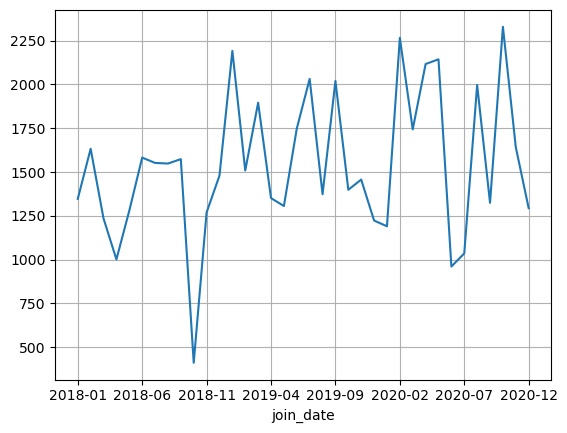

In [10]:
df_2.groupby('join_date').mean().plot()
plt.grid()

**Punto extra**

(Life time value/cac) por cohort

In [11]:
ltv = df_2.groupby('join_date').mean()
ltv = ltv.to_frame()

In [12]:
new_customers = df_2.groupby('join_date').count()
customers_expenses.rename(columns={'month': 'join_date'}, inplace=True)

In [13]:
df_3 = customers_expenses.merge(new_customers, on = 'join_date')
df_3.rename(columns={'purchase_amount' : 'customers'}, inplace = True)
df_3['cac'] = df_3.marketing_expense/df_3.customers
df_3.head()

,join_date,marketing_expense,customers,cac
0,2018-01,2046.184675,8,255.773084
1,2018-02,3748.778170,13,288.367552
2,2018-03,2759.304618,11,250.845874
3,2018-04,3350.762738,7,478.680391
4,2018-05,4872.743045,5,974.548609


In [14]:
ltv.rename(columns={'purchase_amount':'ltv'}, inplace = True)
todo = ltv.merge(df_3, on = 'join_date', how = 'inner')
todo.head()

,join_date,ltv,marketing_expense,customers,cac
0,2018-01,1346.764906,2046.184675,8,255.773084
1,2018-02,1632.414187,3748.778170,13,288.367552
2,2018-03,1234.833670,2759.304618,11,250.845874
3,2018-04,1001.312582,3350.762738,7,478.680391
4,2018-05,1279.456269,4872.743045,5,974.548609


In [15]:
todo['ltv/cac'] = todo.ltv/todo.cac
todo.head()

,join_date,ltv,marketing_expense,customers,cac,ltv/cac
0,2018-01,1346.764906,2046.184675,8,255.773084,5.265468
1,2018-02,1632.414187,3748.778170,13,288.367552,5.660880
2,2018-03,1234.833670,2759.304618,11,250.845874,4.922679
3,2018-04,1001.312582,3350.762738,7,478.680391,2.091819
4,2018-05,1279.456269,4872.743045,5,974.548609,1.312871


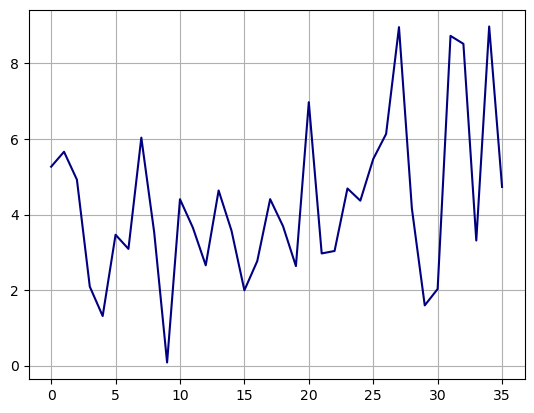

In [16]:
plt.plot(todo['ltv/cac'], c = 'navy')
plt.grid()

<Axes: xlabel='join_date', ylabel='ltv/cac'>

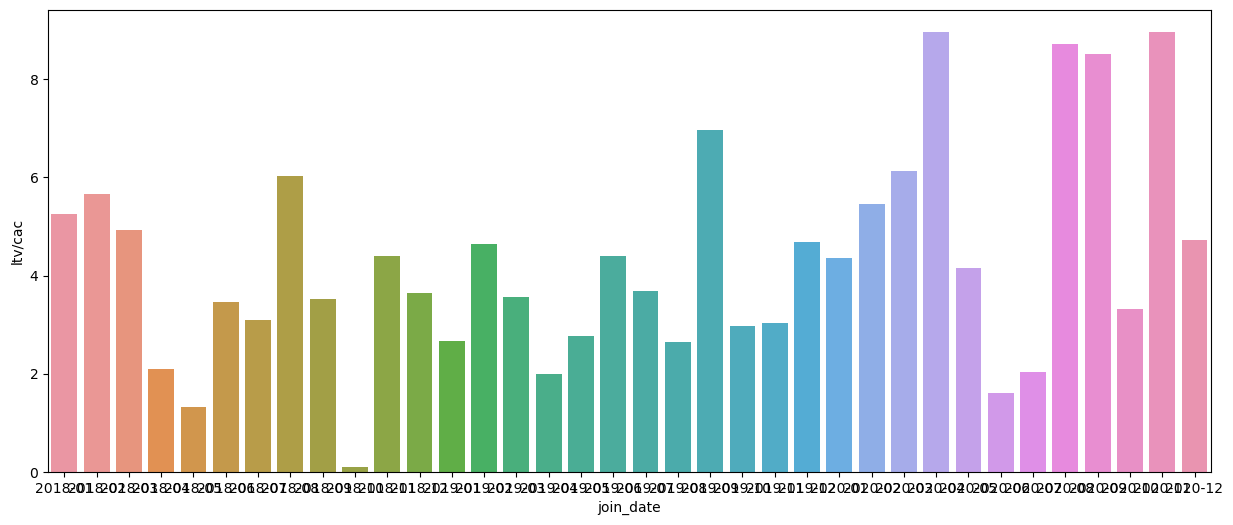

In [17]:
plt.figure(figsize=(15, 6))
sns.barplot(x='join_date', y='ltv/cac', data=todo)